In [1]:
!pip install -U -q pandas numpy matplotlib seaborn scipy scikit-learn 

In [2]:
from IPython.display import HTML
from IPython.display import YouTubeVideo
styles = open("./custom.css", "r").read()
HTML(styles)

# Inferring Daily Alcohol Consumption from Liver Function Tests with Linear Regression

<div class="abstract">
    This tutorial showcases the use of **Multilinear Regression Ordinary Least Squares (OLS) method** in order to infer alcohol consumption from participant bloodwork. Liver Disorders data [1], donated by BUPA Medical Research Ltd. is used as a dataset and contains male participant bloodwork test results. The target variable is the number of daily half-pint drinks consumed while the bloodwork tests include indicators of liver disease such as the average size of red blood cells (MCV), liver enzymes that help metabolize vitamins and amino acids (ALP, ALT, AST), and liver enzymes that help metabolize xenobiotics (foreign substances) (GGT). In this walkthrough, I hope to demonstrate that in use-cases which call for simplicity and interpretability (frequenlty found in clinical settings), multiple linear regression can help draw important insights and analyze complex data in a simple and explainable manner. I will showcase how the model's assumptions can be validated, how its performance can be evaluated, and how a small fix can lead to improved results. This tutorial will also demonstrate the importance of understanding the subject matter and how prior knowledge can help interpret unexpected results.   
    
</div>

### Background and Data

BUPA Medical Research Ltd. database donated by Richard S. Forsyth contains 5 features describing results of blood work performed on male subject in the 1980s. The dataset also contains "drinks" columns which is used as a target variable in this analysis. Ultimately, I want to find out if we can infer how much a participant in this study drinks based on his bloodwork and to identify which blood tests play a role in the inference analysis. 

Liver performs several key functions in a mammal body. Liver is responsible for filtration and storage of blood. Proteins are metabolized by liver and turned into amino acids, which will then be reassembled into structural proteins, enzymes, and hormones. Excess amino acids go to liver for processing and metabolism, where liver releases amonia (will turn into uric acid), glutamate, glutamine, aspartate. Liver also forms bile and is able to regenerate.  

The target variable counts the number of drinks that the study participant consumes daily and is measured in half-pints. This metric is self-reported and may not be a truthful representation of the actual amount of alcohol consumed. Alcohol consumption may be variable for each individual and each participant might metabolize alcohol differently.

Nontheless, it would be interesting to know how much of the variance can be explained by the liver function test results.

Enzymes are released by the liver due to hepatocellular (specific to liver cells) injury include:
* AST (`sgot`) - Aspartate Aminotransferase - also found in muscles, found primarily in a mitochondrium of the liver lobule.
* ALT (`sgpt`) - Alanine Aminotransferase - primary to liver, found mostly in cytoplasm
Generally, these two enzymes are found in 1-to-1 ratio. Significantly large values (ten times larger then the baseline) indicate an acute and severe disease. If the values are five times greater than the baseline, the values can indicate chronic conditions like fatty liver, chonic hepatatis, or  prolonged use of liver-damaging medication. This implies that **the relationship between AST, ALT and our target variable is likely not linear.** Moreover, AST is more indicative of alcohol damage because ethanol found in alcohol may be causing damage to the mitochondria. Therefore, elevated proportion of AST to ALT may be a sign of alcoho-induced damage.

And enzymes which are released due to cholestasis (impairment of flow of bile from the liver to the small intestive) include:
* ALP (`alkphos`) - Alkaline Phosphotase - it is not specific to the liver and can be found in a number of organs 
* GGT (`gammagt`) - Gamma-Glutamil Transpeptidase - if this enzyme is up and ALP is up, it will point to cholestasis

Albumin, PT, and Billirubin are frequently tested for liver disease and damage but are not included in this dataset. Instead, the dataset includes Mean Corpuscular Volume (MVC, `mcv`) which measures the average red blood cell size. Size of red blood cells could increase due to increased deposition of cholesterol and phospholipids on the membranes of the cells. A healthy liver is able to remove red blood cells during maturation (typically 120 days) but a damaged liver may not be as effective. 

Liver damage can result not just from alcohol damage. Viral hepatitis, genetic conditions, illicit drug use, and use of medication can cause liver damage as well. Age, demographics, diet, and environmental factors can alter bloodwork results. Longevity and pattern of alcohol consumption can influence the results as well. Therefore, **we should expect that a small proportion of alcohol consumption variance would explained by the model of liver function tests**.

A human body is not an islated system so it is likely that some of our feautres are not indepent of each other. However, it would still be helpful to assess their relationship with our target variable in order to assess their contribution to inferring alcohol consumption. Using Multilinear Regression can help assess the role of detectable liver damage indicators on overall variability in alcohol consumption. 

A multitude of factors that play a role in the association with drinks (e.g. age, general health status, longevity of alcohol consumption pattern, patient and medical history). 

The following video by Dr Matt & Dr Mike provides an excellent source of domain knowledge regarding liver function tests. 

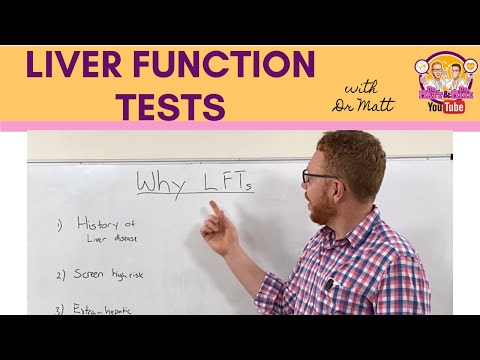

In [7]:
display(HTML('<a href="https://www.youtube.com/watch?v=tY-1eOoDHSU">Click here to access the video on YouTube</a>'))
display(YouTubeVideo('tY-1eOoDHSU', width=560, height=315))

### Approach

In this tutorial, I will assume that the ultimate goal is to assess which liver function tests are critical for understanding how much alcohol a patient consumes. I would like to create a model that is simple and easily explainable so that I can relay its results to healthcare providers. 

For this reason, I will choose a linear regression model. A linear regression model assumes that the output variable is a sum of input variables multiplied by their respective coefficients plus some error term. Given $k$ features, this model can be estimated as:

$$
\hat{y} = \hat{\beta_0} + \hat{\beta_1} X_1 + \hat{\beta_2} X_2 + ... + \hat{\beta_i} X_i + ... + \hat{\beta_k} X_k 
$$

where $\hat{y}$ is a vector representing the estimated output and $\textbf{X}$ is a matrix representing the input features. 

I will evaluate the results of the baseline model and make necessary adjustments to satisfy assumptions and improve performance. Then, I will reconstruct the model and make inferences from its results. 

Some of the assumptions and goals that should be satisfied include: constant variance of errors (no heterschedacticity), error terms independent and uncorrelated, input features do not exhibit coliniarity, and no outliers and high leverage points.

### References

[1] Liver Disorders [dataset]. 2016. UCI Machine Learning Repository. Available from: https://doi.org/10.24432/C54G67.

[2] https://medlineplus.gov/lab-tests/mcv-mean-corpuscular-volume/

[3] https://emedicine.medscape.com/article/203858-overview#a6

[4] https://medlineplus.gov/lab-tests/alkaline-phosphatase/

[5] Lowe D, Sanvictores T, Zubair M, et al. Alkaline Phosphatase. [Updated 2023 Oct 29]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2025 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK459201/

[6] Moriles KE, Zubair M, Azer SA. Alanine Aminotransferase (ALT) Test. [Updated 2024 Feb 27]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2025 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK559278/

[7] https://medlineplus.gov/lab-tests/ast-test/#:~:text=AST%20(aspartate%20aminotransferase)%20is%20an,of%20AST%20in%20your%20blood.

[8] Lonardo A, Ndrepepa G. Concise review: gamma-glutamyl transferase - evolution from an indiscriminate liver test to a biomarker of cardiometabolic risk. Metab Target Organ Damage. 2022;2:17. http://dx.doi.org/10.20517/mtod.2022.20

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats import descriptivestats as ds
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import normalize

In [9]:
# define matplotlib styles

sns.set_style('ticks')
sns.set_palette('colorblind')

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':8})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

rc('axes', **{'labelsize':9, 'titlesize':9, 'linewidth':1})
rc('xtick', **{'labelsize':8})
rc('ytick', **{'labelsize':8})

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['figure.figsize'] = 4, 4

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Import the dataset, which is available to download from UCI Machine Learning Repository

In [10]:
# import the dataset

liver_disorders = pd.read_csv('bupa.data', header=None)
liver_disorders.columns = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector']

In [11]:
# define target variable and features

target = liver_disorders['drinks']

features = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt']
X = liver_disorders[features]

## Exploring the Data

In [12]:
print(f"The size of our dataset is {len(X)} instances")

The size of our dataset is 345 instances


In [13]:
# summarize statistics 

ds.describe(X, stats=['missing', 'mean', 'median', 'std', 'ci', 'skew', 'kurtosis']).round(3).T

,missing,mean,upper_ci,lower_ci,std,skew,kurtosis,median
mcv,0.0,90.159,90.629,89.690,4.448,-0.387,5.530,90.0
alkphos,0.0,69.870,71.806,67.934,18.348,0.750,3.720,67.0
sgpt,0.0,30.406,32.465,28.347,19.512,3.050,16.597,26.0
sgot,0.0,24.643,25.705,23.581,10.064,2.283,11.005,23.0
gammagt,0.0,38.284,42.426,34.142,39.255,2.854,13.308,25.0


In [14]:
ds.describe(target, stats=['missing', 'mean', 'median', 'mode', 'std', 'ci', 'skew', 'kurtosis']).round(3).T

,missing,mean,upper_ci,lower_ci,std,skew,kurtosis,mode,mode_freq,median
drinks,0.0,3.455,3.807,3.103,3.338,1.537,6.593,0.5,0.313,3.0


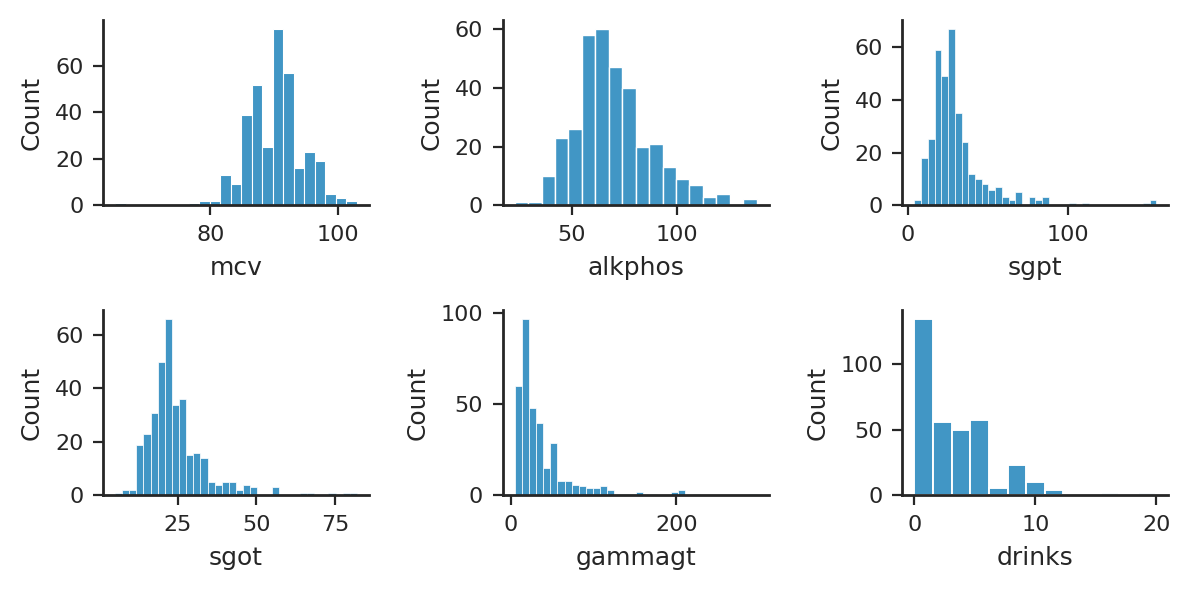

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 3))
sns.histplot(data=X, x='mcv', ax=axes[0][0])
sns.histplot(data=X, x='alkphos', ax=axes[0][1])
sns.histplot(data=X, x='sgpt', ax=axes[0][2])
sns.histplot(data=X, x='sgot', ax=axes[1][0])
sns.histplot(data=X, x='gammagt', ax=axes[1][1])
sns.histplot(data=target, ax=axes[1][2])
plt.tight_layout()
plt.show()

<div class="summary"> 

Some of the variables are showing skew and kurtosis but generally, observations will probably show a bell shaped curve. This dataset is pretty clean and is not missing any variables. 

Target variable is skewed to the left with most values being 0 or 1 and contains some extreme values. These could either be severe cases of alcoholism or data inaccuracies. 

</div>

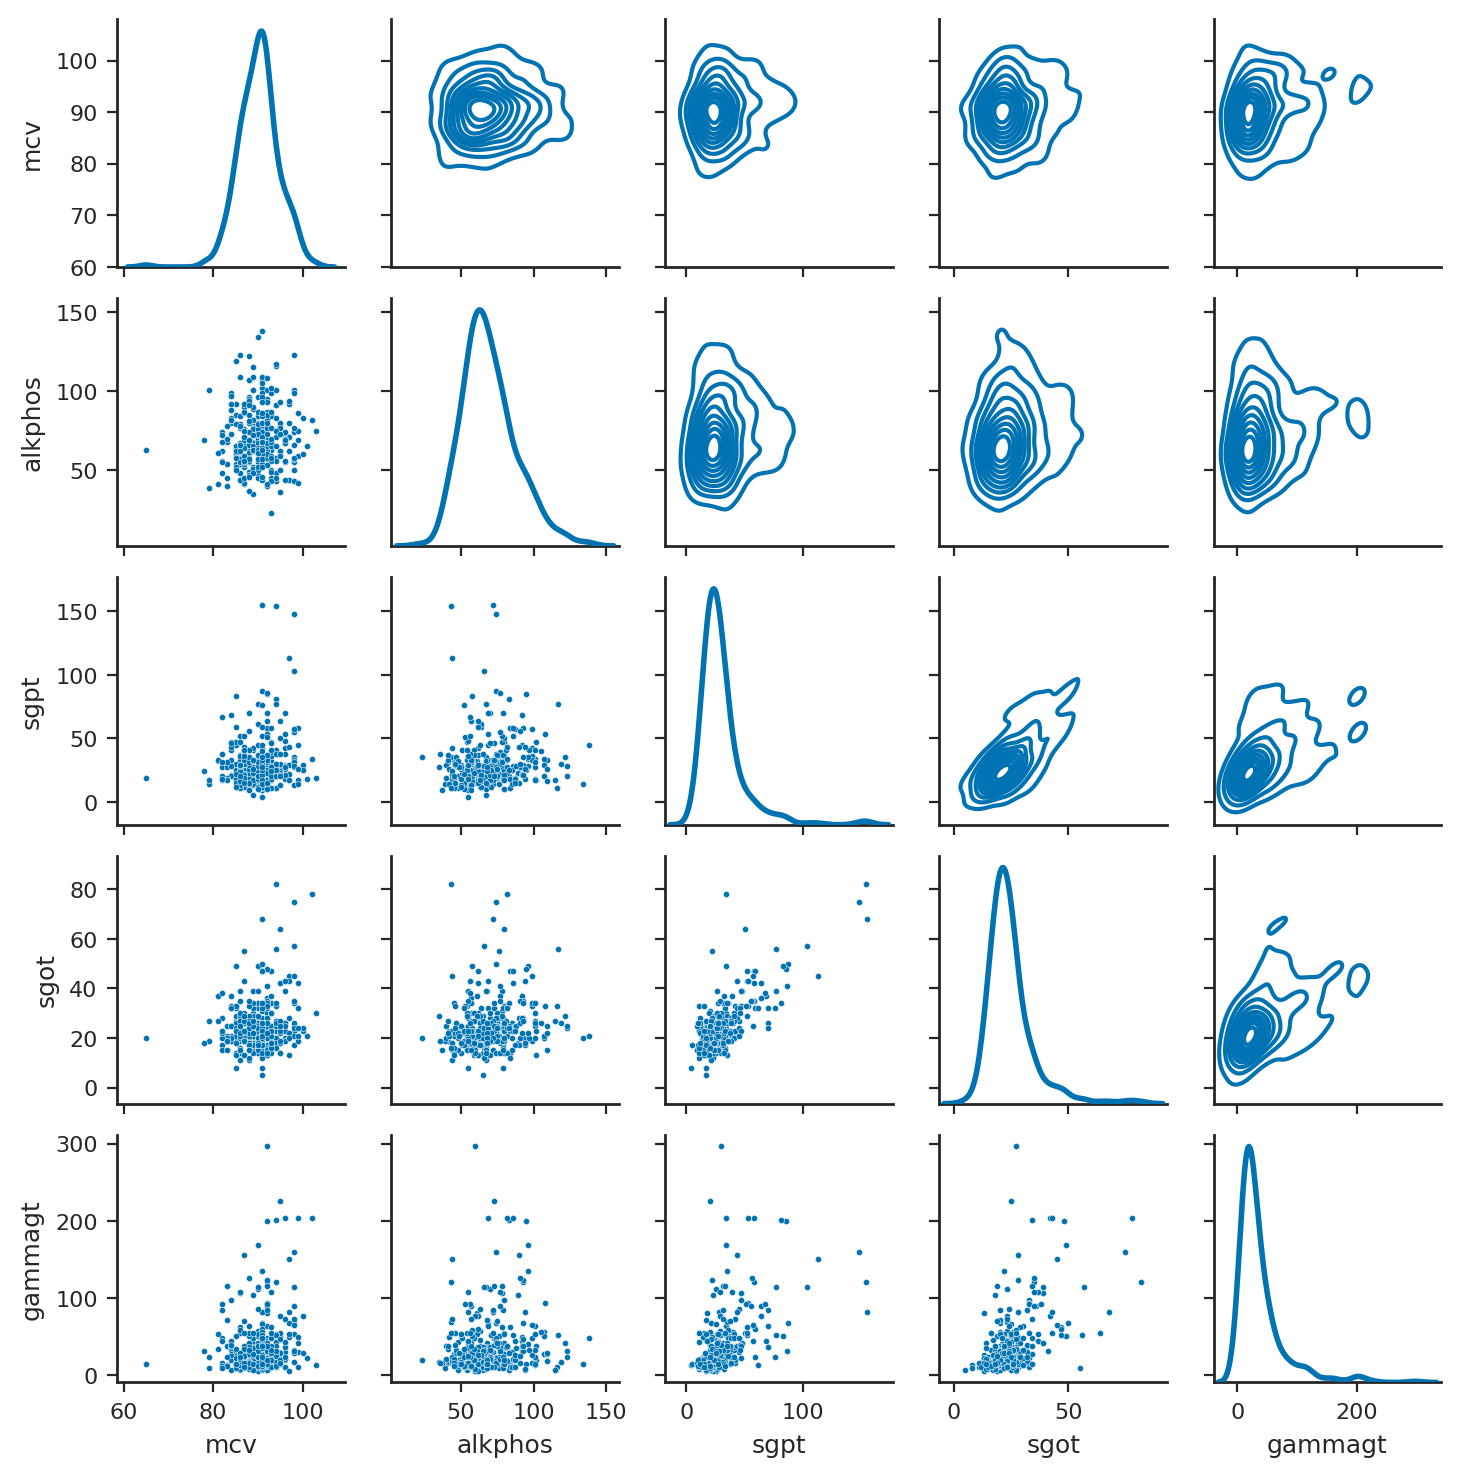

In [16]:
g = sns.PairGrid(X, diag_sharey=False, height=1.5)
g.map_lower(sns.scatterplot, s=5)
g.map_upper(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.show()

<div class="summary">

There are definitely some interesting patterns that emerge when we plot normalized feature values. It looks like GGT (gammgagt) has a pretty strong relationship with the other blood tests so we can suspect some degree of coliniarity. 
    
</div>

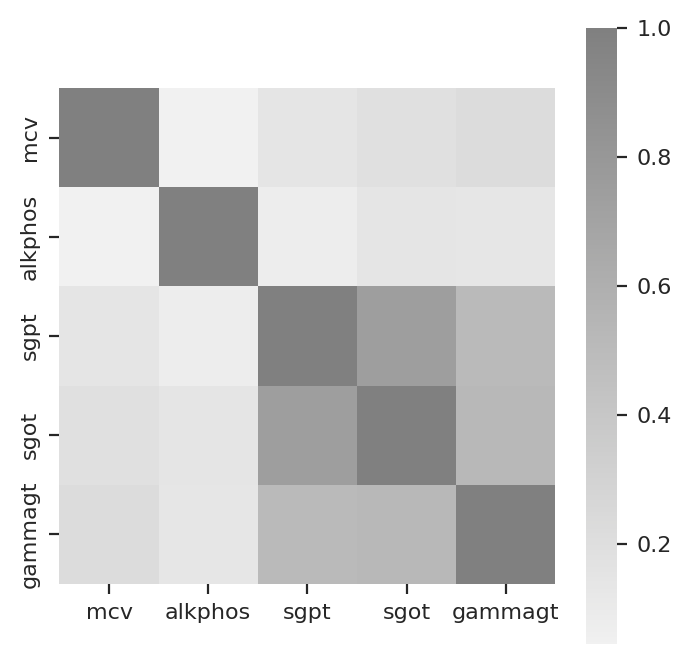

In [17]:
# Generate a heatmap of feature correlation
sns.heatmap(X.corr(), cmap=sns.color_palette("light:gray", as_cmap=True), square=True, cbar=True)
plt.show()

<div class="summary"> 

sgpt and sgot appear to have most correlation. It appears they are also correlated to gammagt. This is expected since these features measure liver damage pronounced via enzymes bloodstream release. 

</div>

## Modeling

In [18]:
# let's use statsmodels OLS to create a baseline model
# statsmodels does not automatically include an intercept
# so we must add it as a feature

X = add_constant(X)

results = sm.OLS(target, X).fit()
predictions = results.predict(X)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 drinks   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     15.73
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           6.26e-14
Time:                        10:08:08   Log-Likelihood:                -868.88
No. Observations:                 345   AIC:                             1750.
Df Residuals:                     339   BIC:                             1773.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.9624      3.413     -4.384      0.0

<div class="summary">

It appears that the baseline model can explain almost 20% of the variance in the target variable. Alkphos and sgpt seem to have pretty high p-values. 
    
</div>

In [19]:
# get additional metrics to evaluate the model and make adjustments

influence = results.get_influence()
leverage = influence.hat_matrix_diag  # leverage detect extereme x values
standardized_residuals = influence.resid_studentized_internal
studentized_residuals = influence.resid_studentized_external  # residual / its estimated standard error

variables = results.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

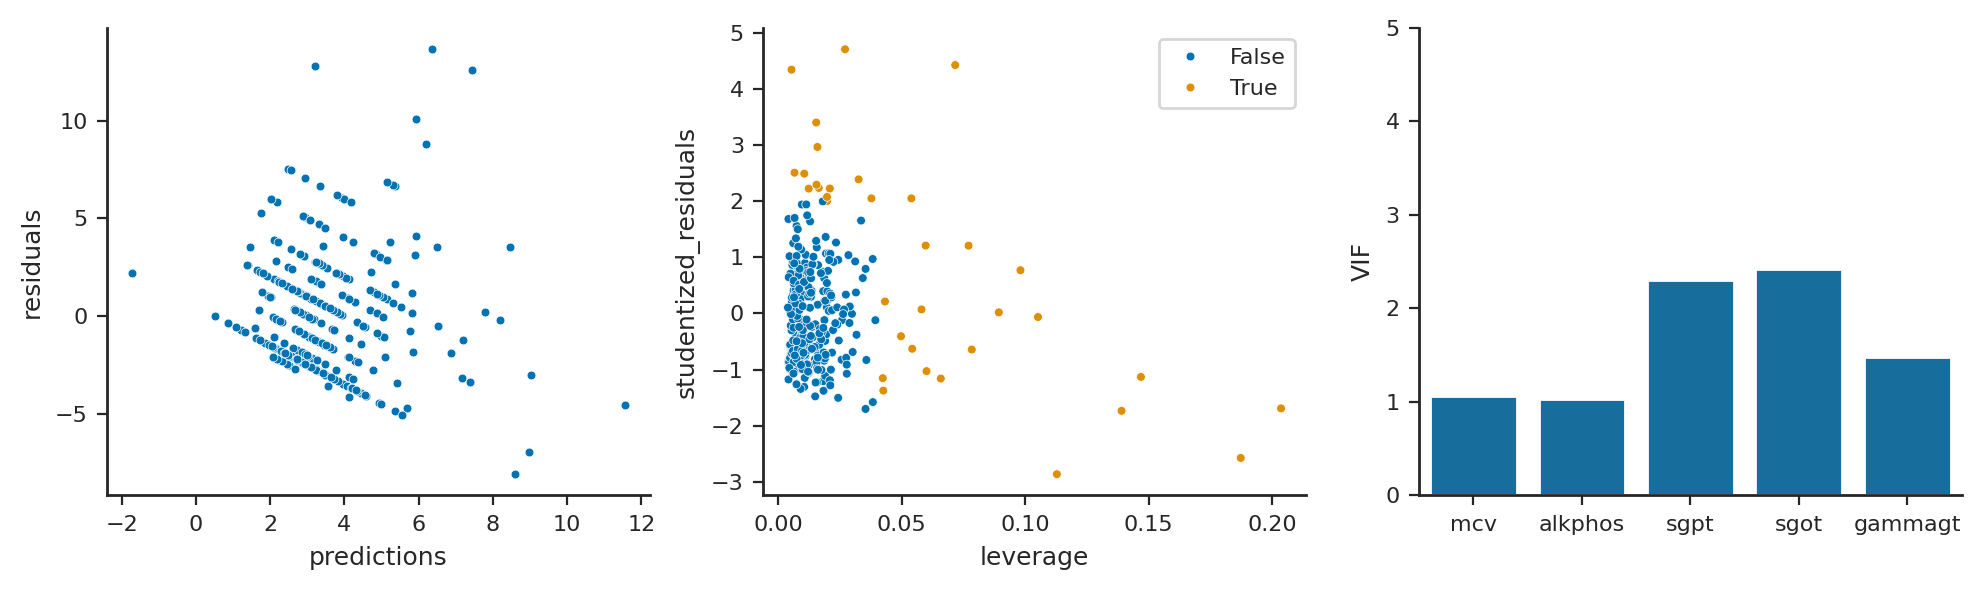

In [20]:
# now we want to check a few assumptions and update the data if needed

# resiudals are independent of x
# residual variance is constant
# no coliniarity 
# no outliers or high leverage points

# we can check these assumptions visually with 4 plots:
#--- 1. x vs. residuals
# 2. fitted values vs. residuals
# 3. leverage vs. studenized residuals
# 4. vif 

residuals = target - predictions

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.scatterplot(x=predictions, y=residuals, ax=axes[0], s=10)
axes[0].set_xlabel('predictions')
axes[0].set_ylabel('residuals')

extreme_values_indexes = (leverage>0.04) | (np.abs(studentized_residuals)>2)
sns.scatterplot(x=leverage, y=studentized_residuals, hue=extreme_values_indexes, ax=axes[1], s=10)
axes[1].set_xlabel('leverage')
axes[1].set_ylabel('studentized_residuals')

sns.barplot(x=features, y=vif[1:], ax=axes[2])
axes[2].set_ylim(0, 5)
axes[2].set_ylabel('VIF')

plt.tight_layout()

plt.show()

<div class="summary">

Residual values do not appear to be dependent on predictions and seem to have constant variance. 

There are quite a few points of high leverage and a few outliers. Heuristically, it appears that any point with leverage > 0.05 may have leverage which is too high and any point with studentized residual of > 3 could be an outlier. --> We will remove these points from the dataset and rebuild the model. 

VIF (Variance Inflation Factor) values are slightly elevated for sgpt and sgot, but are not too suspicious. We know that sgpt and sgot test amount of serum liver enzymes which play a role in amino acid metabolism. It is likely that the use of both metrics is redundant but since their suspected coliniarity is not too high, we can keep both variables in our model.  
    
</div>

## Final Model and Inference

In [21]:
# remove extreme values we found
X_new = X[~extreme_values_indexes]
target_new = target[~extreme_values_indexes]

results = sm.OLS(target_new, X_new).fit()
predictions = results.predict(X)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 drinks   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     14.33
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.33e-12
Time:                        10:08:15   Log-Likelihood:                -694.54
No. Observations:                 310   AIC:                             1401.
Df Residuals:                     304   BIC:                             1423.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9920      2.927     -4.439      0.0

<div class="summary">

Removing outliers and high leverage points improved $R^2$ but did not improve the F-score. F-score can be expressed as a product of $R^2$ and $\Large \frac{n-k-1}{k}$ where $n$ is the number of samples and $k$ is the number of features. If we remove some samples from the dataset, $n$ will decrease and the if $R^2$ doesn't change, F-score should decrease. If $R^2$ increased but we observed that the F-score decreased, it means that $R^2$ did not increase proportional to the number of samples we removed. If the null hypothesis that there is no relationship between input variables and the output is true, F-score would be close to 1 but since F-score is pretty high, I'm not worried in the little drop.  

Morever, removing the outliers and high leverage points did cause p-values to appear more definitive, which can help with inference of liver function test imporance on our assessment.  

Since sgot, sgpt, and alkphos represent enzymes responsible for liver's metabolism of amino acids and vitamins, it is probable that only one of these factors is needed to infer alcohol consumption, if this consumption results in some liver damage. 

</div>

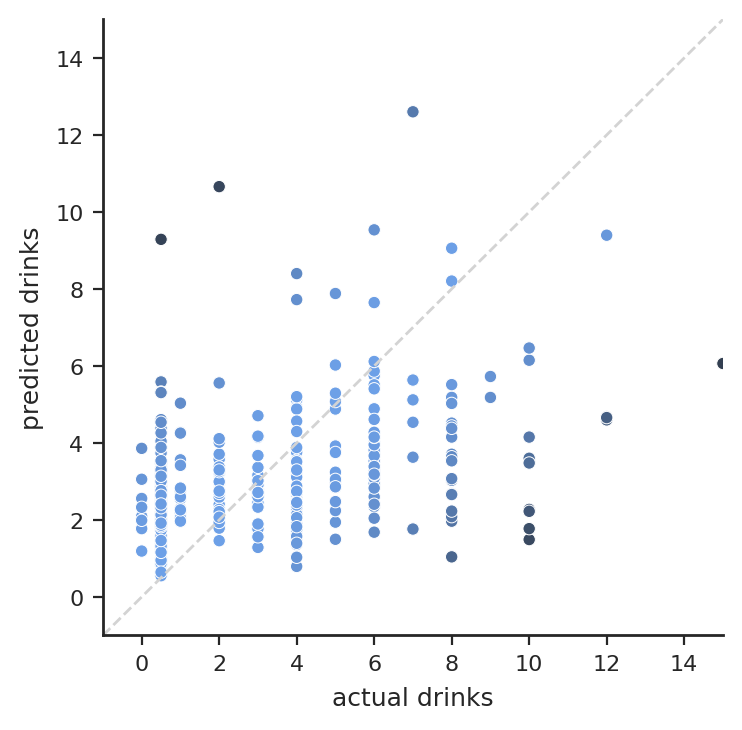

In [23]:
sns.scatterplot(x=target, y=predictions, hue=np.square(target - predictions), 
                palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True),
                s=20)
sns.lineplot(x=np.linspace(-1, 15, 16), y=np.linspace(-1, 15, 16), lw=1, linestyle='--', color='lightgray')
plt.ylabel('predicted drinks')
plt.xlabel('actual drinks')
plt.ylim(-1, 15)
plt.xlim(-1, 15)
plt.legend().set_visible(False)
plt.show()

<div class="summary">

Comparing actual vs. predicted values visually, it is evident that the model performs just OK. Since our model explains a bit less than 20% variation in the drinks, we can assume that there are other confounding variables that play a role. 

It also appears that the model performs much worse for higher and lower number of drinks. 

</div>

## Interpretation

**Can we infer alcohol consumption from bloodwork?**

Yes, it is possible to infer daily alcohol consumption from a pateint's bloodwork. The $R^2$ value of 0.191 implies that the <mark>blood markers in this study can help explain nearly 20% of the variance in alcohol consumption</mark>. Considering that our data omits participant demongraphic information, medical history and existing conditions, and other confounding factors, this is pretty good result. 

As mentioned in the introduction, bloodwork tests present in this dataset point to a number of conditions. At the same time, a persons unique phisiology may play a role in how drinking may present in bloodwork tests. Longevity of the drinking pattern, environmental factors, and age probably play a big role. Finally, drinks per day is self-reported and may not represent actual drinking nor the patterns of drinking. 

**What is the relationship between bloodwork factors and drinks consumed per day?**

This model assessed the relationship to alcohol consumption of 5 different bloodwork tests. These tests include measurement of red blood cells, enzymes that liver uses to metabolize amino acids and vitamins, and enzymes that liver users to break down xenobiotics. All three factors can be used together to infer alcohol consumption but using more than amino acid and vitamin metabolizing enzyme may be redundant. 

The model constucted here indicates that <mark>MCV has a positive linear relationship with alcohol consumption and that an increas in one additional unit of MVC can explain almost 16% of additional daily drinks consumed</mvc>. <mark>AST and GGT also share a positive linear relationship with alcohol consumption</mark> and an appearance of an additional unit of each in bloodwork tests may be related to 6% and 3% increase id daily alcohol consumption respectively, all other factors considered. 

**What are the limitations of this analysis?**

The goal of this analysis was to establish if a simple linear model can help infer daily alcohol consumption habits for participant males from their bloodwork. Therefore, the results of this model should not be used to infer information about women and people of other genders. Environmental factors have likely played a role and we don't know where the participants have come from. The data in this study is nearly 40 years old. Units of all metrics were not included and we cannot validate quality of the data points considered. This model could provide a good framework for re-doing the analysis in light of more comprehensive data. 

**Is a linear model best for studying this data?**

The linear model has lead to some amazing insights regarding alcohol consumption. Its simplicity and interpretability proves that it is a robust tool for drawing relationships between variables and assessing the consequences of those relationships. It is most useful in clinical settings where it can be helpful in making inferences and hypotheses and understanding complex information in a simple manner. 